In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-502-2025`


In [2]:
Pkg.add(["Turing","Distributions","Statistics","StatsPlots","Random","FillArrays"])

    Updating registry at `~/.julia/registries/NeurobloxRegistry`
    Updating git-repo `https://github.com/Neuroblox/NeurobloxRegistry`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025/Project.toml`
  No Changes to `~/Documents/programming/BME-502-2025/Manifest.toml`


In [3]:
using Turing, Distributions, Statistics, StatsPlots, Random, FillArrays

In [4]:
function ou(delta,sigma,N)
    nd = Normal(0,sigma)
    x = [rand(nd)]
    for i in 2:N
        push!(x,delta*x[end]+rand(nd))
    end
    return x
end

ou (generic function with 1 method)

In [5]:
x = ou(0.8,1.0,1000)

1000-element Vector{Float64}:
 -0.9916066101908994
 -0.09598205491343836
 -0.6860801372993036
 -1.9240231129958643
 -2.1122686057813356
 -1.344706620504328
 -1.2830585914664494
 -0.48334630228707387
 -1.1758706876772016
 -1.3172925267885753
 -0.5384533189832444
 -0.7568492814550232
  0.36330197202648373
  ⋮
  2.418062229374251
  2.81557666710584
  1.4049798515844234
  3.2538513981173125
  2.549076924299828
  2.296649919644263
  0.9619563979196089
  1.3650031801123088
  2.4114751419974896
  2.9434277138690947
  1.9260674597608343
  2.125524291409502

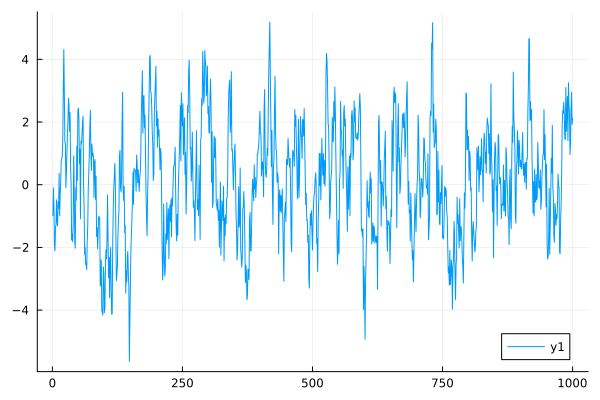

In [6]:
plot(x)

In [7]:
std(x)

1.7488509891958657

In [8]:
@model function ou_model(x)
    delta ~ Uniform(0.5,0.99)
    sigma ~ Uniform(0.1,2.0)
    x[1] ~ Normal(0,sigma)
    for i in 2:length(x)
        x[i] ~ Normal(x[i-1]*delta,sigma)
    end
end

ou_model (generic function with 2 methods)

In [9]:
my_oumodel = ou_model(x)

DynamicPPL.Model{typeof(ou_model), (:x,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.ou_model, (x = [-0.9916066101908994, -0.09598205491343836, -0.6860801372993036, -1.9240231129958643, -2.1122686057813356, -1.344706620504328, -1.2830585914664494, -0.48334630228707387, -1.1758706876772016, -1.3172925267885753  …  1.4049798515844234, 3.2538513981173125, 2.549076924299828, 2.296649919644263, 0.9619563979196089, 1.3650031801123088, 2.4114751419974896, 2.9434277138690947, 1.9260674597608343, 2.125524291409502],), NamedTuple(), DynamicPPL.DefaultContext())

In [10]:
chain = Turing.sample(my_oumodel, NUTS(0.65), 5000)

┌ Info: Found initial step size
└   ϵ = 0.05

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00

Chains MCMC chain (5000×14×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 4.83 seconds
Compute duration  = 4.83 seconds
parameters        = delta, sigma
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse    ess_bulk    ess_tail      rhat   ⋯
      Symbol   Float64   Float64   Float64     Float64     Float64   Float64   ⋯

       delta    0.8203    0.0181    0.0002   5795.8218   3569.9779    1.0003   ⋯
       sigma    1.0051    0.0230    0.0003   5049.8371   3065.9309    1.0005   ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

  

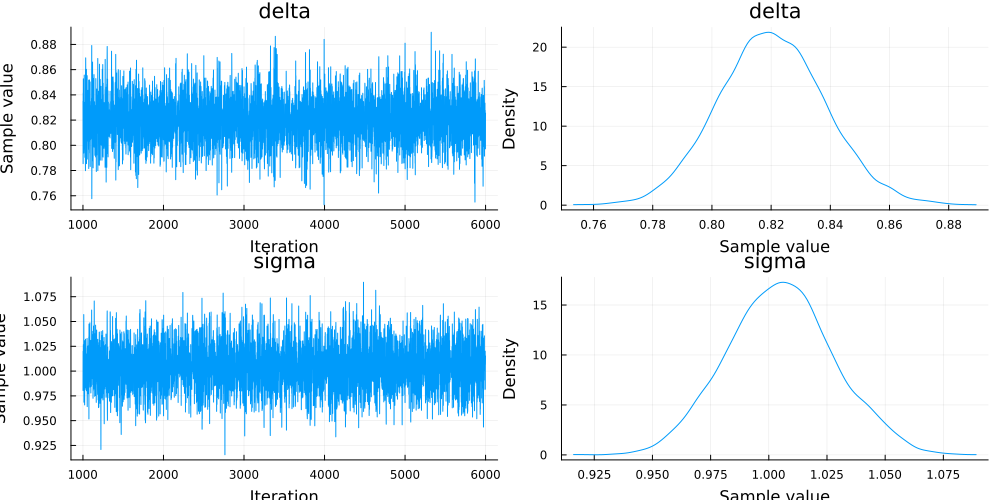

In [12]:
plot(chain)

In [13]:
function noisy_ou(delta,sigma,msigma,N)
    nd = Normal(0,sigma)
    md = Normal(0,msigma)
    x = [rand(nd)]
    for i in 2:N
        push!(x,delta*x[end]+rand(nd))
    end
    return x .+ rand(md,length(x))
end

noisy_ou (generic function with 1 method)

In [14]:
xn = noisy_ou(0.8,1.0,0.5,100)

100-element Vector{Float64}:
 -1.3680745078650673
 -3.5107691913310646
 -2.005008382362369
 -0.6213588562692227
 -0.06708023308466127
  1.0478601792894784
  1.0147794135608725
  0.41282991434178606
  0.42884299800091286
  1.3741984199681476
  2.7313214368551026
  4.587718541630927
  3.0827931579694203
  ⋮
 -0.7295176814387238
 -1.1850217063202821
  0.7669116452375382
 -1.2340612822212216
 -1.5382396506555216
 -1.3614550458431725
  1.6972916991738272
  1.572032630039927
  0.421165460557329
  0.253764710116554
  0.844342500736171
 -0.4017861683428913

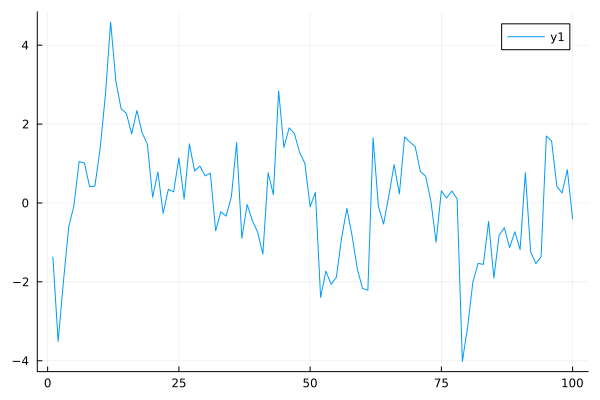

In [15]:
plot(xn)

In [16]:
std(xn)

1.4844797088272852

In [17]:
@model function noisy_ou_model(x, sigmam)
    delta ~ Uniform(0.5,0.99)
    sigma ~ Uniform(0.1,2.0)
    xl = tzeros(length(x))
    
    xl[1] ~ Normal(0,sigma)
    for i in 2:length(x)
        xl[i] ~ Normal(xl[i-1]*delta,sigma)
    end

    for i in length(x)
        x[i] ~ Normal(xl[i],sigmam)
    end
end

noisy_ou_model (generic function with 2 methods)

In [18]:
my_noisyou_model = noisy_ou_model(xn,0.5)

DynamicPPL.Model{typeof(noisy_ou_model), (:x, :sigmam), (), (), Tuple{Vector{Float64}, Float64}, Tuple{}, DynamicPPL.DefaultContext}(Main.noisy_ou_model, (x = [-1.3680745078650673, -3.5107691913310646, -2.005008382362369, -0.6213588562692227, -0.06708023308466127, 1.0478601792894784, 1.0147794135608725, 0.41282991434178606, 0.42884299800091286, 1.3741984199681476  …  0.7669116452375382, -1.2340612822212216, -1.5382396506555216, -1.3614550458431725, 1.6972916991738272, 1.572032630039927, 0.421165460557329, 0.253764710116554, 0.844342500736171, -0.4017861683428913], sigmam = 0.5), NamedTuple(), DynamicPPL.DefaultContext())

In [19]:
chainn = Turing.sample(my_noisyou_model, NUTS(0.65), 5000)

┌ Info: Found initial step size
└   ϵ = 0.4

Sampling: 100%|█████████████████████████████████████████| Time: 0:01:03

Chains MCMC chain (5000×114×1 Array{Float64, 3}):

Iterations        = 1001:1:6000
Number of chains  = 1
Samples per chain = 5000
Wall duration     = 67.1 seconds
Compute duration  = 67.1 seconds
parameters        = delta, sigma, xl[1], xl[2], xl[3], xl[4], xl[5], xl[6], xl[7], xl[8], xl[9], xl[10], xl[11], xl[12], xl[13], xl[14], xl[15], xl[16], xl[17], xl[18], xl[19], xl[20], xl[21], xl[22], xl[23], xl[24], xl[25], xl[26], xl[27], xl[28], xl[29], xl[30], xl[31], xl[32], xl[33], xl[34], xl[35], xl[36], xl[37], xl[38], xl[39], xl[40], xl[41], xl[42], xl[43], xl[44], xl[45], xl[46], xl[47], xl[48], xl[49], xl[50], xl[51], xl[52], xl[53], xl[54], xl[55], xl[56], xl[57], xl[58], xl[59], xl[60], xl[61], xl[62], xl[63], xl[64], xl[65], xl[66], xl[67], xl[68], xl[69], xl[70], xl[71], xl[72], xl[73], xl[74], xl[75], xl[76], xl[77], xl[78], xl[79], xl[80], xl[81], xl[82], xl[83], xl[84], xl[85], xl[86], xl[87], xl[88], xl[89], xl[90], xl[91], xl[92], xl[93], xl[94], xl[95], xl[96], xl[97], xl[

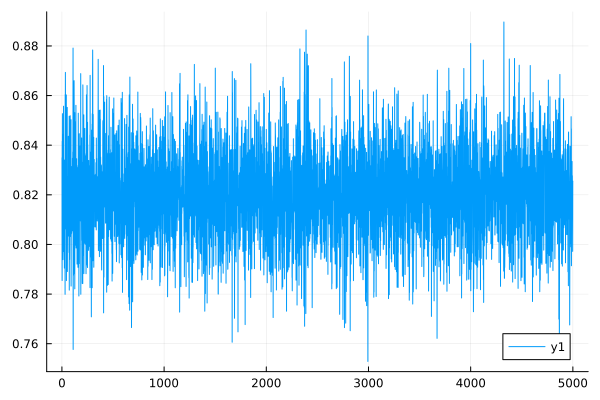

In [21]:
plot(chain[:delta])

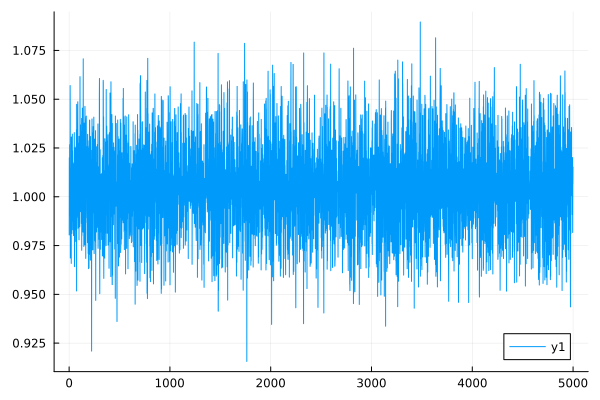

In [22]:
plot(chain[:sigma])